In [60]:
import numpy as np
from env.dis_one_joint import ArmEnv
from until.until import ReplayMemory
from matplotlib import pyplot as plt
%matplotlib inline

(50, 50, 3)


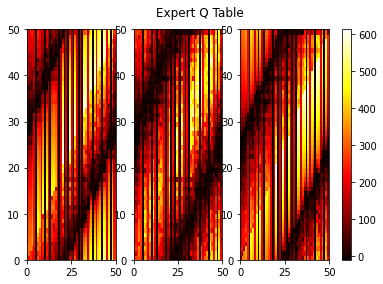

In [61]:
Q_table = np.load("checkpoints/Q_value_table.npy")
print(Q_table.shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Expert Q Table')
im1 = ax1.pcolor(Q_table[:, :, 0], cmap='hot')
im2 = ax2.pcolor(Q_table[:, :, 1], cmap='hot')
im3 = ax3.pcolor(Q_table[:, :, 2], cmap='hot')

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.2, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im1, cax=cb_ax)

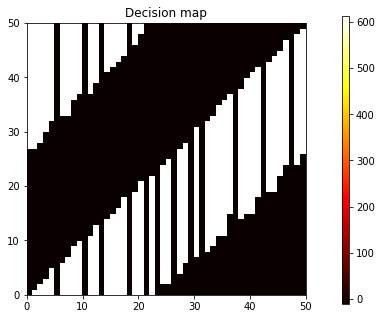

In [62]:
fig = plt.figure(figsize=(5, 5))
plt.title('Decision map')
max_decision = np.argmax(Q_table, axis=2)
plt.pcolor(max_decision, cmap="hot")
cb_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im1, cax=cb_ax)

In [58]:
EP_LEN = 50
expert_len = 50  # number of demonstration
env = ArmEnv(ep_len=EP_LEN)
obs_dim = env.observation_space
action_dim = env.action_dim
seed = 112

# load replay buffer -- state, action, reward, next_state, done
expert_buffer = ReplayMemory(seed=seed, capacity=expert_len*EP_LEN)
expert_buffer.load_buffer("checkpoints/buffer_one_joint_")

Loading buffer from checkpoints/buffer_one_joint_


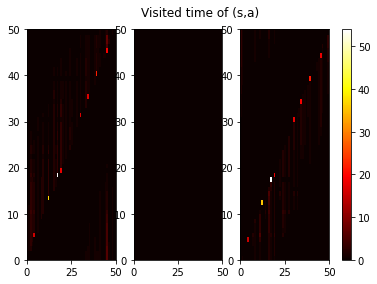

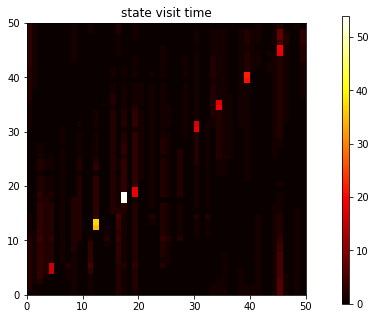

In [59]:
visit_time = np.zeros((obs_dim + [action_dim]))
len_traj = len(expert_buffer.buffer)

for i in range(len_traj):
    state = expert_buffer.buffer[i][0]
    action = expert_buffer.buffer[i][1]
    visit_time[state[0], state[1], action] +=1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Visited time of (s,a)')
im1 = ax1.pcolor(visit_time[:, :, 0], cmap='hot')
im2 = ax2.pcolor(visit_time[:, :, 1], cmap='hot')
im3 = ax3.pcolor(visit_time[:, :, 2], cmap='hot')

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.2, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im1, cax=cb_ax)

fig = plt.figure(figsize=(5, 5))
plt.title('state visit time')
s_visit_time = visit_time.sum(axis=2)
plt.pcolor(s_visit_time, cmap="hot")
cb_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im1, cax=cb_ax)

In [ ]:
# A new q table
TD_Q_table = np.zeros((obs_dim + [action_dim]))
lr = 0.1
gamma = 0.99

# update the Q table along with the trajectory
Q_table[state, action] = reward + gamma * max(Q_table[next_state[0], next_state[1], :]